# My Project

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date
import sklearn
import itertools
import re
import string
import csv

Load train data

In [2]:
#load train data
df = pd.read_csv('C:\\Users\\DELL\\Desktop\\data_scientist\\PROJ1\\d\\y1.txt', sep="\n", header = None, error_bad_lines=False)
df['gender'] = pd.read_csv('C:\\Users\\DELL\\Desktop\\data_scientist\\PROJ1\\d\\y2.txt', sep="\n", header = None, error_bad_lines=False)
df.columns = ['message', 'gender']

#get 5000 instances from each gender
df1 = df[df.gender == 0].sample(5000, random_state=43)
df2 = df[df.gender == 1].sample(5000, random_state=43)

b'Skipping line 3570: expected 1 fields, saw 2\nSkipping line 3573: expected 1 fields, saw 2\nSkipping line 3582: expected 1 fields, saw 2\nSkipping line 3642: expected 1 fields, saw 2\nSkipping line 3682: expected 1 fields, saw 2\nSkipping line 3796: expected 1 fields, saw 2\nSkipping line 4172: expected 1 fields, saw 2\nSkipping line 4175: expected 1 fields, saw 2\nSkipping line 4295: expected 1 fields, saw 2\nSkipping line 4695: expected 1 fields, saw 2\nSkipping line 4769: expected 1 fields, saw 2\nSkipping line 4906: expected 1 fields, saw 2\nSkipping line 4964: expected 1 fields, saw 2\nSkipping line 5231: expected 1 fields, saw 2\nSkipping line 5317: expected 1 fields, saw 2\nSkipping line 5345: expected 1 fields, saw 2\nSkipping line 5661: expected 1 fields, saw 2\nSkipping line 5721: expected 1 fields, saw 2\nSkipping line 5730: expected 1 fields, saw 2\nSkipping line 5867: expected 1 fields, saw 2\nSkipping line 5888: expected 1 fields, saw 2\nSkipping line 5915: expected 1 f

Load test data

In [3]:
#load test data
df_testf = pd.read_csv('C:/Users/DELL/Desktop/data_scientist/rnn/ff_new.txt', sep="\n", header = None, error_bad_lines=False)
df_testf['gender']= 1
df_testf.columns=['message', 'gender']

df_testm = pd.read_csv('C:/Users/DELL/Desktop/data_scientist/rnn/mm_new.txt', sep="\n", header = None, error_bad_lines=False)
df_testm['gender']= 0
df_testm.columns=['message', 'gender']

Examples of new sentences </br>
female:

In [4]:
print(df_testf.head().message)

0    סידורים באוכל הערב הייתה לה כי בסגנון
1                                  כזה אני
2                              תקראו לעשות
3                            עייפה ויכולתי
4         חחחחח 5 רק אחיות לטובה נראה אותך
Name: message, dtype: object


male:

In [5]:
print(df_testm.head().message)

0                  חסר שטעיתי כל לבדוק אני
1                                הוא לפתוח
2                           הביא בסיס באמת
3             בודק עצבן תענה שמישהי לי סתם
4    מצד הנחתי חחחח ככה machine מודלים אתם
Name: message, dtype: object


In [6]:
#merge train and test sets
df=pd.concat([df1,df2,df_testm,df_testf])
df.index=range(0,12387)

# Text Cleaning
remove punctuation <br>
remove stopwords

In [7]:
# remove punctuation from data
regex = re.compile('[%s]' % re.escape(string.punctuation))
df['message_clean']= df['message'].apply(lambda x: regex.sub('', x))

In [8]:
from collections import Counter
#creat stop-words - the x most frequent words - get bad results so not used
# result=df.message_clean.apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0)
# result=result.sort_values(ascending=False)
# stop=result.head(500)
# #remove stop-words
# df['message_clean'] = df['message_clean'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

# Feature extraction
* number of words in message
* number of sentances in message
* number of punctuation in message
* check suffix ת after אני- eg. אני חושבת
* general emojis
* feminine emojis- hearts, flowers..
* sequences like חחחח
* topic modeling
* best topic for each example
* tfidf

In [9]:
#word count
df['word_count']=df['message'].apply(lambda x: len(x.split(' '))-1)
reg_line = re.compile('([^.\\n;?!]* *[.\\n;?!]+)[ .\\n;?!]*|[^.\\n;?!]+$')
#sentances count
df['sen_count']=df['message'].apply(lambda x: len(re.findall(reg_line,x)))
#punctuation count
reg = """[\.\!\?\"\-\,\']+"""
df['punctuation']=df['message'].apply(lambda x: len(re.findall(reg, x)))

#suffixs features
regex='(אני+ [א|ב|ג|ד|ה|ו|ז|ח|ט|י|כ|ל|נ|ס|ע|פ|צ|ק|ר|ש|ת]+ת)'
df['suffix']=df['message'].apply(lambda x: len(re.findall(regex,x)))
regex='(אני+ [א|ב|ג|ד|ה|ו|ז|ח|ט|י|כ|ל|נ|ס|ע|פ|צ|ק|ר|ש|ת]+ה)'
df['suffix2']=df['message'].apply(lambda x: len(re.findall(regex,x)))

#emoji features
reg='😀|😃|😄|😁|😆|😅|😂|🤣|☺|😊|😇|🙂|🙃|😉|😌|😍|😘|😔|😞|😒|😏|🤠|🤡|😎|🤓|🤗|🤑|😛|😝|😜|😋|😚|😙|😗|😧|🤥|👾|😦|🤔|👽|😯|🙄|☠|😑|😴|💀|😐|😪|👻|💩|😓|😶|😡|😭|👺|👹|🤤|😠|😤|😥|👿|😈|😢|😩|😫|😰|🤕|🤒|😨|😖|😣|😱|😷|🤧|😳|☹|🙁|😵|🤢|🤐|😲|😕|😟|😮|😬|👍|👌|🖕|🍺|🍻'
reg2='👩‍|❤‍|💋‍|👩|👨‍|❤‍|💋‍|👨|💏|👨‍|❤‍|👨|👩‍|❤‍|👩|💑|💋|💄|♥|❤|💛|💚|💙|💜|💔|💕|🌷|🌹|🌻|🌼|🌸|🌺'
df['emoji']=df['message_clean'].apply(lambda x: len(re.findall(reg,x)))
df['emoji2']=df['message_clean'].apply(lambda x: len(re.findall(reg2,x)))

#sequence features
reg='אאא+|בבב+|גגג+|דדד+|ההה+|ווו+|זזז+|חחח+|טטט+|ייי+|כככ+|ללל+|מממ+|נננ+|ססס+|עעע+|פפפ+|צצצ+|קקק+|ררר+|ששש+|תתת+|םםם+|ףףף+|ךךך+|ץץץ+'
df['sequence']=df['message'].apply(lambda x: len(re.findall(reg,x)))

# Topic Modeling
A generative statistical model that allows sets of observations to be explained by unobserved groups that explain why some parts of the data are similar.  
4 topics, min df=10, max df=0.1

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
SOME_FIXED_SEED = 42
np.random.seed(SOME_FIXED_SEED)

vectorizer = CountVectorizer(min_df=10, max_df=0.1, encoding="cp1255")
# matrix [doc,term] for each entry number of occurence of term t in doc d
mat = vectorizer.fit_transform(df["message_clean"])
lda = LatentDirichletAllocation(n_topics=4)
# matrix [doc,topic] for each entry probability of topic t in doc d
topics = lda.fit_transform(mat)

df_topics_words = pd.DataFrame()
for i in range(lda.components_.shape[0]):
    k=pd.DataFrame(lda.components_, columns=vectorizer.get_feature_names()).T[i].sort_values(ascending=False).head(100)
    df_topics_words['topic '+str(i)+' words'] = k.index
    df_topics_words['topic '+str(i)+' value'] = k.values
    d=dict(zip(vectorizer.get_feature_names(),map(lambda x: int(x),lda.components_[0])))
    
#create docs-topics df
for i in range(topics.shape[1]):
    df['topic_'+str(i)]=pd.to_numeric(topics.T[i])
    
#best topic for each example
df["topic"] = df[["topic_0", "topic_1", "topic_2", "topic_3"]].idxmax(axis=1)

C:\Users\DELL\Anaconda3\envs\py35\lib\site-packages\sklearn\decomposition\online_lda.py:508: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


In [11]:
df_topics_words.head(5)

,topic 0 words,topic 0 value,topic 1 words,topic 1 value,topic 2 words,topic 2 value,topic 3 words,topic 3 value
0,מה,722.981055,זה,737.674407,את,503.693587,לי,415.664544
1,עם,354.310906,אז,359.807208,יש,346.147625,כן,348.371945
2,אתה,338.533310,חחח,338.435131,על,320.376742,אנונימוס,325.016465
3,גם,335.980369,לך,323.626161,הוא,255.030919,או,200.644068
4,של,335.844716,את,268.403950,חחחח,233.637801,עוד,187.784076


# Tf-idf

In [23]:
df3=df
from sklearn.feature_extraction.text import TfidfVectorizer
#TfidfVectorizer-Convert a collection of raw documents to a matrix of TF-IDF features
tfidfvectorizer = TfidfVectorizer(analyzer = "word",tokenizer = None, ngram_range=(1,3), max_features = 5000, stop_words = None,min_df=1, use_idf=True)
tfidf_matrix = tfidfvectorizer.fit_transform(df3["message_clean"])
tfidf_matrix = tfidf_matrix.todense()
tfidf_matrix2=tfidf_matrix
tfidf_matrix=np.c_[tfidf_matrix, df3.emoji, df3.emoji2, df3.sequence, df3.suffix2, df3.word_count, df3.sen_count,\
                  df3.punctuation, df3.topic_0, df3.topic_1, df3.topic_2, df3.topic_3, df3.suffix]

# Visualization

In [24]:
colorm='coolwarm'
df_vis=df[:10000]
df_vis.gender.groupby(df_vis.gender).agg(['count'])

,count
gender,
0,5000
1,5000


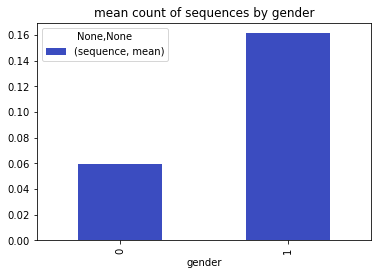

In [25]:
plot6=df_vis[['sequence']].groupby(df_vis.gender).agg(['mean'])
plot6.plot(kind='bar', stacked=True, grid=False, title='mean count of sequences by gender', colormap=colorm)

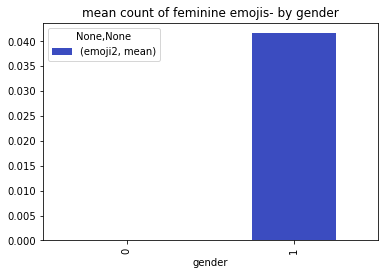

In [26]:
plot5=df_vis[['emoji2']].groupby(df_vis.gender).agg(['mean'])
plot5.plot(kind='bar', stacked=True, grid=False, title='mean count of feminine emojis- by gender', colormap=colorm)

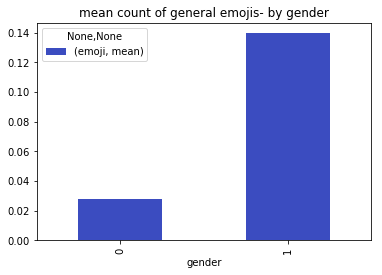

In [27]:
plot0=df_vis[['emoji']].groupby(df_vis.gender).agg(['mean'])
plot0.plot(kind='bar', stacked=True, grid=False, title='mean count of general emojis- by gender', colormap=colorm)

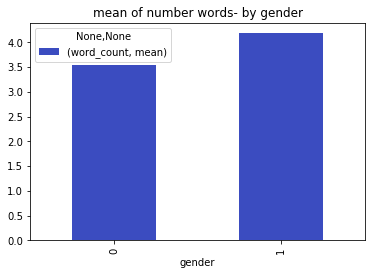

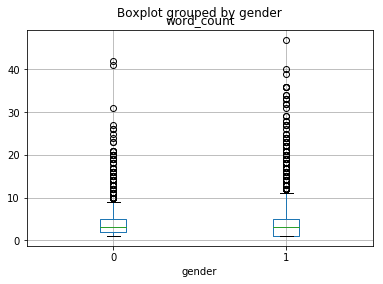

In [28]:
plot2=df_vis[['word_count']].groupby(df_vis.gender).agg(['mean'])
plot2.plot(kind='bar', stacked=True, grid=False, title='mean of number words- by gender', colormap=colorm)

df_vis.boxplot(column='word_count', by = 'gender')

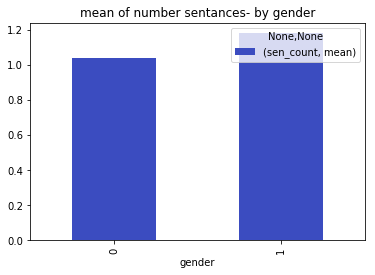

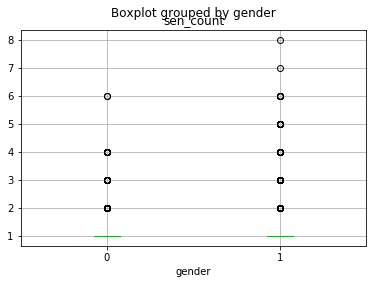

In [29]:
plot3=df_vis[['sen_count']].groupby(df_vis.gender).agg(['mean'])
plot3.plot(kind='bar', stacked=True, grid=False, title='mean of number sentances- by gender', colormap=colorm)

df_vis.boxplot(column='sen_count', by = 'gender')

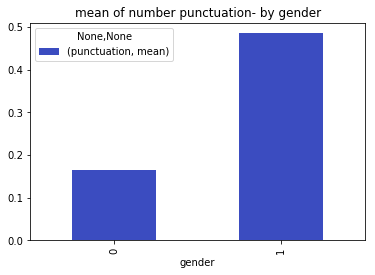

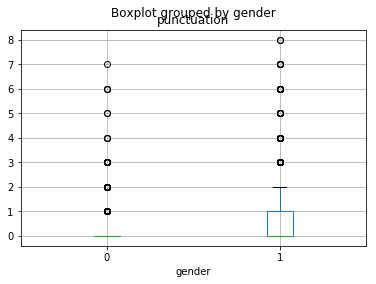

In [30]:
plot4=df_vis[['punctuation']].groupby(df_vis.gender).agg(['mean'])
plot4.plot(kind='bar', stacked=True, grid=False, title='mean of number punctuation- by gender', colormap=colorm)

df_vis.boxplot(column='punctuation', by = 'gender')

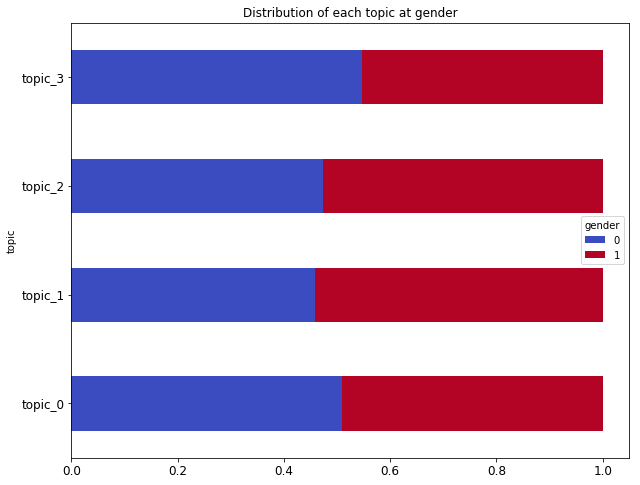

In [31]:
df4=df_vis.groupby(by=['topic','gender']).size().unstack(level=-1).fillna(0).apply(lambda x: x.apply(lambda y: y/x.sum()),axis=1)
ax=df4.plot.barh(stacked=True,figsize=(10,8),grid=False,fontsize=12,title='Distribution of each topic at gender', colormap=colorm)
plt.show()

# Modeling

In [32]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm, classes,
                      normalize=False,
                      title='Confusion matrix',
                      cmap=plt.cm.Purples):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [33]:
#split train, test sets
train_x = tfidf_matrix[0:10000]
train_y = df3["gender"][0:10000]
test_x = tfidf_matrix[10000:]
test_y = df3["gender"][10000:]

# Random forest
Criterion- gini, Number of Trees=500  
Calc Accuracy score  
Calc precision_recall_fscore_support scores  
Print confusion_matrix

In [34]:
from sklearn.externals import joblib
#load model
forest = joblib.load('C:\\Users\\DELL\\Desktop\\data_scientist\\rnn\\rf_model1.pkl')

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
# Initialize a Random Forest classifier with 500 trees
forest = RandomForestClassifier(criterion='gini', 
                         n_estimators=500, #The number of trees in the forest
                         min_samples_split=10,
                         min_samples_leaf=1,
                         max_features='auto',
                         oob_score=True,
                         random_state=1,
                         n_jobs=-1)

# Fit the forest to the training set, using the bag of words as 
# features and the gender labels as the response variable
forest = forest.fit( train_x, train_y )
# save the model
joblib.dump(forest, 'C:\\Users\\DELL\\Desktop\\data_scientist\\rnn\\rf_model1.pkl') 

In [36]:
# Evaluate accuracy best on the test set
score_rf=forest.score(test_x,test_y)
print(score_rf)

0.713028906577


In [37]:
from sklearn.metrics import classification_report
results=forest.predict(test_x)

#precision_recall_fscore_support
c_report=classification_report(test_y,results)
print(c_report)

             precision    recall  f1-score   support

          0       0.67      0.83      0.74      1176
          1       0.78      0.60      0.68      1211

avg / total       0.73      0.71      0.71      2387



Confusion matrix, without normalization
[[975 201]
 [484 727]]
Normalized confusion matrix
[[ 0.83  0.17]
 [ 0.4   0.6 ]]


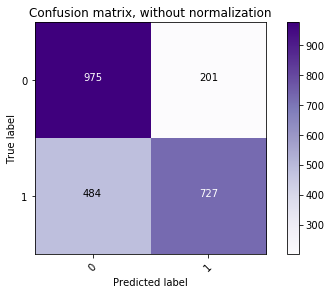

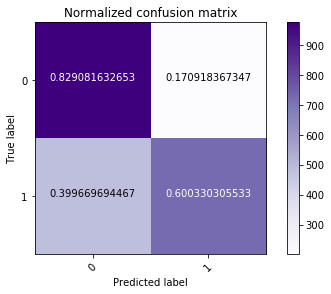

In [38]:
#print the confusion matrix
c_matrix=confusion_matrix(test_y,results)   
classes=df3.gender.unique()
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(c_matrix, classes,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(c_matrix, classes, normalize=True,
                      title='Normalized confusion matrix')

plt.show()


# GradientBoosting
Max_depth=7, n_estimators=100  
Calc Accuracy score  
Calc precision_recall_fscore_support scores  
Print confusion_matrix

In [39]:
GradientBoosting = joblib.load('C:\\Users\\DELL\\Desktop\\data_scientist\\rnn\\gb_model1.pkl')

In [40]:
from sklearn.ensemble import GradientBoostingClassifier
GradientBoosting = GradientBoostingClassifier(max_depth=7, max_features=0.35000000000000003, min_samples_leaf=6, min_samples_split=13, n_estimators=100)
GradientBoosting.fit(train_x, train_y)

# save the model
joblib.dump(GradientBoosting, 'C:\\Users\\DELL\\Desktop\\data_scientist\\rnn\\gb_model1.pkl')

In [41]:
# Evaluate accuracy best on the test set
score_GB=GradientBoosting.score(test_x,test_y)
score_GB

0.68705488060326769

# LogisticRegression

In [42]:
LR=sklearn.linear_model.LogisticRegression(penalty='l2')
LR.fit(train_x, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [43]:
score_LR=LR.score(test_x,test_y)
score_LR

0.79681608713866781

In [44]:
resultsLR=LR.predict(test_x)
c_reportLR=classification_report(test_y,resultsLR)
print(c_reportLR)

             precision    recall  f1-score   support

          0       0.74      0.90      0.81      1176
          1       0.88      0.70      0.78      1211

avg / total       0.81      0.80      0.79      2387



Confusion matrix, without normalization
[[1057  119]
 [ 366  845]]
Normalized confusion matrix
[[ 0.9  0.1]
 [ 0.3  0.7]]


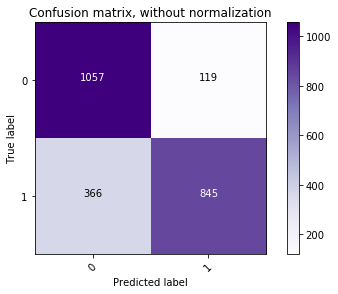

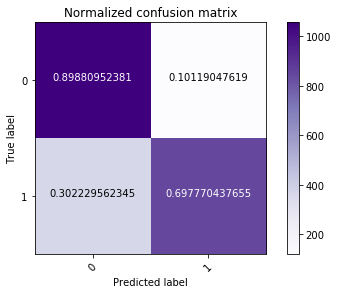

In [45]:
c_matrixLR=confusion_matrix(test_y,resultsLR)   
classes=df3.gender.unique()
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(c_matrixLR, classes,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(c_matrixLR, classes, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

# Results

In [46]:
print('scores')
res=pd.DataFrame([[score_rf,score_LR,score_GB]],columns=['RandomForest',\
                     'LogisticRegression','GradientBoosting']).T.sort(columns=0,ascending=0)
print(res)

scores
                           0
LogisticRegression  0.796816
RandomForest        0.713029
GradientBoosting    0.687055


C:\Users\DELL\Anaconda3\envs\py35\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


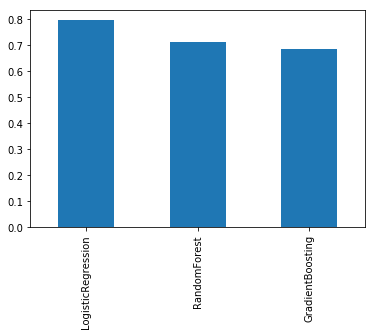

In [47]:
res.plot(kind='bar', stacked=False, grid=False, legend=False)

# Try only with tf-idf

In [48]:
#split train, test sets
train_x = tfidf_matrix2[0:10000]
train_y = df3["gender"][0:10000]
test_x = tfidf_matrix2[10000:]
test_y = df3["gender"][10000:]

# Random forest

In [49]:
from sklearn.externals import joblib
#load model
forest = joblib.load('C:\\Users\\DELL\\Desktop\\data_scientist\\rnn\\rf_model_tfidf.pkl')

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
# Initialize a Random Forest classifier with 500 trees
forest = RandomForestClassifier(criterion='gini', 
                         n_estimators=500, #The number of trees in the forest
                         min_samples_split=10,
                         min_samples_leaf=1,
                         max_features='auto',
                         oob_score=True,
                         random_state=1,
                         n_jobs=-1)

# Fit the forest to the training set, using the bag of words as 
# features and the gender labels as the response variable
forest = forest.fit( train_x, train_y )
# save the model
joblib.dump(forest, 'C:\\Users\\DELL\\Desktop\\data_scientist\\rnn\\rf_model_tfidf.pkl') 

In [51]:
# Evaluate accuracy best on the test set
score_rf=forest.score(test_x,test_y)
print(score_rf)

0.75073313783


In [52]:
from sklearn.metrics import classification_report
results=forest.predict(test_x)

#precision_recall_fscore_support
c_report=classification_report(test_y,results)
print(c_report)

             precision    recall  f1-score   support

          0       0.76      0.72      0.74      1176
          1       0.74      0.78      0.76      1211

avg / total       0.75      0.75      0.75      2387



Confusion matrix, without normalization
[[846 330]
 [265 946]]
Normalized confusion matrix
[[ 0.72  0.28]
 [ 0.22  0.78]]


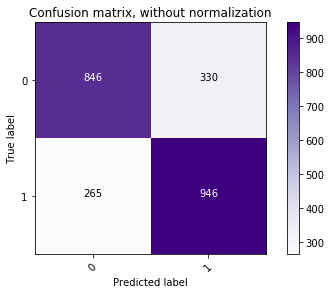

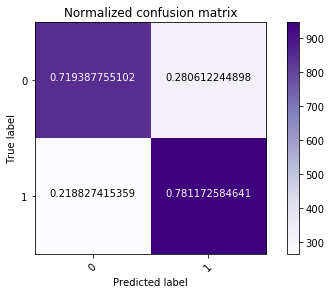

In [53]:
#print the confusion matrix
c_matrix=confusion_matrix(test_y,results)   
classes=df3.gender.unique()
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(c_matrix, classes,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(c_matrix, classes, normalize=True,
                      title='Normalized confusion matrix')

plt.show()


# GradientBoosting

In [54]:
GradientBoosting = joblib.load('C:\\Users\\DELL\\Desktop\\data_scientist\\rnn\\gb_model_tfidf.pkl')

In [55]:
from sklearn.ensemble import GradientBoostingClassifier
GradientBoosting = GradientBoostingClassifier(max_depth=7, max_features=0.35000000000000003, min_samples_leaf=6, min_samples_split=13, n_estimators=100)
GradientBoosting.fit(train_x, train_y)

# save the model
joblib.dump(GradientBoosting, 'C:\\Users\\DELL\\Desktop\\data_scientist\\rnn\\gb_model_tfidf.pkl')

In [56]:
# Evaluate accuracy best on the test set
score_GB=GradientBoosting.score(test_x,test_y)
score_GB

0.69962295768747385

# LogisticRegression

In [57]:
LR=sklearn.linear_model.LogisticRegression(penalty='l2')
LR.fit(train_x, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [58]:
score_LR=LR.score(test_x,test_y)
score_LR

0.84792626728110598

In [59]:
resultsLR=LR.predict(test_x)
c_reportLR=classification_report(test_y,resultsLR)
print(c_reportLR)

             precision    recall  f1-score   support

          0       0.84      0.86      0.85      1176
          1       0.86      0.84      0.85      1211

avg / total       0.85      0.85      0.85      2387



Confusion matrix, without normalization
[[1011  165]
 [ 198 1013]]
Normalized confusion matrix
[[ 0.86  0.14]
 [ 0.16  0.84]]


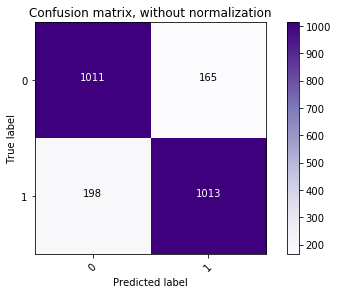

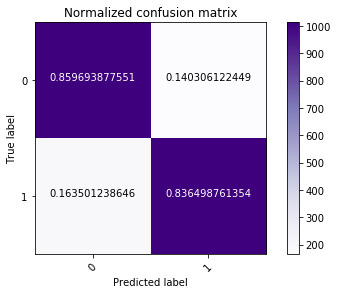

In [60]:
c_matrixLR=confusion_matrix(test_y,resultsLR)   
classes=df3.gender.unique()
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(c_matrixLR, classes,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(c_matrixLR, classes, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

# Results

In [61]:
print('scores')
res=pd.DataFrame([[score_rf,score_LR,score_GB]],columns=['RandomForest',\
                     'LogisticRegression','GradientBoosting']).T.sort(columns=0,ascending=0)
print(res)

scores
                           0
LogisticRegression  0.847926
RandomForest        0.750733
GradientBoosting    0.699623


C:\Users\DELL\Anaconda3\envs\py35\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


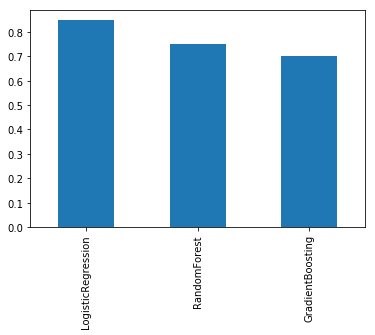

In [62]:
res.plot(kind='bar', stacked=False, grid=False, legend=False)

# Summery
### part1
1. Data Collection- Collect messages from whatsapp. Data Selection Consider what data is available, what data is missing and what data can be removed.
2. Preprocessing- Data Cleaning, Data Preprocessing Organize your selected data by formatting, cleaning and sampling from it.

###  part2
1. Data Analysis with virtualization- is a process of inspecting, cleansing, transforming, and modeling data with the goal of discovering useful information and suggesting conclusions.
2. Feature extraction from an initial set of measured data and builds derived values (features) intended to be informative and non-redundant. we used many features and used with bad of words models like tfidf and topic modeling.
3. Features Selection- It is the selection of attributes in your data that are most relevant to the predictive modeling problem you are working on.
4. Models Traning

###  part3
1. Build rnn model
2. Generate new sequences, new messages for each gender.

### part4
1. Test the models with new sequences(rnn results)  

# Conclusions
1. Preprocessing phase is very crucial to accurate classification model training!
2. According to the results of the model we can see that with the features we created can be classified well between the messages and the types of each species.
3. To improve the neural network model, we need to train it longer and work with more data- More time is better, More data is better.
4. The model with the highest accuracy is Logistic regressing Model(0.847926).

# Problems
1. There are no free text processing tools like Stemming which support the Hebrew language
2. There is no good sets of stopwords.